In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import os
os.chdir('/home/omkar/CNN proj/archive')

In [8]:
# import sys

# sys.path.append('/usr/local/lib/python2.7/site-packages')

# !pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [39]:
data =[]
labels = []
classes =43 
cur_path = os.getcwd()
for i in range(classes):     
    path = os.path.join(cur_path,'train',str(i))     
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path +'/'+ a)             
            image = image.resize((30,30)) 
            # Resizing all images into 30*30                                                 
            image =np.array(image)             
            data.append(image)             
            labels.append(i)
        except Exception as e:
            print(e)

In [40]:
data = np.array(data) 
labels = np.array(labels)
print(data.shape, labels.shape) 
# (78418,30,30,3)(78418,)


(39209, 30, 30, 3) (39209,)


In [41]:
X_train, X_test, y_train, y_test =train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [42]:
y_train = to_categorical(y_train,43) 
y_test = to_categorical(y_test,43)

In [52]:
y_train.shape,y_test.shape

((31367, 43), (7842, 43))

In [53]:
model =Sequential() 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:])) 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.25)) 
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25)) 
model.add(Flatten()) 
model.add(Dense(256, activation='relu')) 
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43in the dense 
model.add(Dense(43, activation='softmax'))

In [54]:
#Compilation of the model 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
epochs = 20 
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

2021-11-14 20:05:25.461542: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 84690900 exceeds 10% of free system memory.


Epoch 1/20
  3/981 [..............................] - ETA: 47s - loss: 23.9578 - accuracy: 0.0417  

2021-11-14 20:05:27.463957: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 29427200 exceeds 10% of free system memory.
2021-11-14 20:05:27.464061: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 29427200 exceeds 10% of free system memory.


981/981 [==============================] - 48s 48ms/step - loss: 2.4532 - accuracy: 0.3510 - val_loss: 0.8259 - val_accuracy: 0.7879
Epoch 2/20
981/981 [==============================] - 54s 55ms/step - loss: 1.0169 - accuracy: 0.6954 - val_loss: 0.3879 - val_accuracy: 0.8841
Epoch 3/20
981/981 [==============================] - 57s 58ms/step - loss: 0.7723 - accuracy: 0.7659 - val_loss: 0.3083 - val_accuracy: 0.9160
Epoch 4/20
981/981 [==============================] - 59s 61ms/step - loss: 0.6317 - accuracy: 0.8054 - val_loss: 0.2281 - val_accuracy: 0.9384
Epoch 5/20
981/981 [==============================] - 59s 61ms/step - loss: 0.5008 - accuracy: 0.8458 - val_loss: 0.1883 - val_accuracy: 0.9449
Epoch 6/20
981/981 [==============================] - 61s 62ms/step - loss: 0.4337 - accuracy: 0.8666 - val_loss: 0.1678 - val_accuracy: 0.9565
Epoch 7/20
981/981 [==============================] - 61s 62ms/step - loss: 0.3944 - accuracy: 0.8798 - val_loss: 0.1314 - val_accuracy: 0.9657
Epo

In [57]:
# import pickle
# pickle.dump(model,open('CNN_Model.pkl','wb'))
model.save("./training/TSR.h5")


In [70]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Vehicle > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing vehicle > 3.5 tons' }


In [89]:
def image_processing(img):
    model = load_model('./training/TSR.h5')
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict(X_test)
    return image,Y_pred


In [109]:
plot,res = image_processing(r'/home/omkar/CNN proj/archive/test/00032.png')

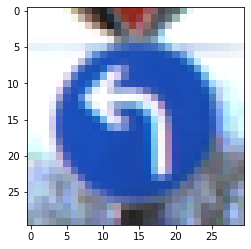

In [110]:
plt.imshow(plot)

In [111]:
final_res = np.argmax(res,axis=1)

In [112]:
classes[final_res[0]]

'Turn left ahead'

In [81]:
s = [str(i) for i in res]
a = int("".join(s))
print(a)

['[5.8061012e-10 9.9999940e-01 1.5627910e-08 7.1879343e-15 6.4692132e-09\n 5.6214242e-07 3.2510564e-10 2.6183255e-08 5.3740378e-14 1.9479038e-25\n 4.8522696e-18 3.9453508e-17 2.1295194e-16 2.9913405e-15 1.2946817e-17\n 2.3912880e-17 8.1717972e-29 2.2008886e-27 8.4950510e-15 3.1392585e-27\n 2.2032330e-19 3.0322888e-14 7.7332512e-27 1.3061095e-19 1.1487020e-16\n 2.2631550e-16 2.4513026e-18 1.2943097e-12 1.3725400e-19 4.7031963e-18\n 5.6870431e-20 8.7556439e-18 2.8509256e-25 9.1207840e-22 1.9261248e-21\n 8.1543917e-21 1.0269521e-23 1.3279639e-19 2.2942454e-18 3.4412830e-20\n 4.0633528e-13 1.3045108e-27 7.3672479e-20]']


In [ ]:
# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)
# training_set = train_datagen.flow_from_directory('/home/omkar/CNN proj',
#                                                  target_size = (64, 64),
#                                                  batch_size = 32,
#                                                  class_mode = 'binary')